## Covid Bayes Net


First we create a Pomegranate Bayesian Network using the protobuf interface and our utility package, bayes, that enables one to conveniently create a Bayesian network by hand without having to fill in every probability.  The same Baysian network can start with our hand entered guesses, but can later learn from data.  Any amount of questions can be answered, including no questions, to get the probabilities of having covid , the severity of illness, and the chances of going to the hospital.  The file the Bayesian net is written in is covid_bayes.py.  Our utility package can then be used to query the network with different patient states.  This is convenient for tuning hand entered parameters .



In [1]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install -e ../covid-bayesnet
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install graphviz



Obtaining file:///home/opencog/covid-bayesnet
  Attempting uninstall: covid-bayes
    Found existing installation: covid-bayes 1.0
    Can't uninstall 'covid-bayes'. No files were found to uninstall.
  Running setup.py develop for covid-bayes


In [2]:
!{sys.executable} -m pip install -r requirements.txt
!sh buildproto.sh

### Covid net
Here put the name of the network you have written with the protobuf and bayes utilities.  Our example is printed out.  We created 4 functions in our utility package: any_of, all_of, if_the_else, and avg, which can together be used to express almost any set of rules, documented elsewhere.  The last lines implement the creation of the description of the network,  bayesianNetwork , with the protobuf utilities, and then the creation of the Pomegranate network with the description.  

In [3]:
text_file = open('./sn_bayes/covid_bayes.py')
file_content = text_file.read()
print(file_content)
text_file.close()

import sn_bayes
from sn_bayes.utils import any_of
from sn_bayes.utils import all_of
from sn_bayes.utils import avg
from sn_bayes.utils import if_then_else
from sn_bayes.utils import bayesInitialize
from sn_bayes.utils import addCpt


import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetwork


def covid_bayes():
	bayesianNetwork = BayesianNetwork()



	#probabilities within distributions must sum to 1.0
	#questions left blank or "prefer not to answer" will be computed

	#anomalies
	
	anomaly = bayesianNetwork.anomalies.add()
	anomaly.varName = "oxygen_anomaly"
	anomaly.high = 200
	anomaly.low =93
	anomaly.high_percent = 0.99
	anomaly.low_percent = 0.10
	anomaly.n = 2
	anomaly.is_all = True
	detectors = anomaly.detectors.add()
	detectors.name = "QuantileAD"
	detectors = anomaly.detectors.add()
	detectors.name = "ThresholdAD"


	anomaly = bayesianNetwork.anomalies.add()
	anomaly.varName = "heart_rate_anomaly"
	anomaly.n_steps = 14
	anomal

 Next run the file.  All routines are stateless.

In [4]:
import sn_bayes
from sn_bayes import covid_bayes
#%run -i './bayes/covid_bayes.py'
#%run -i './bayes/test.py'
bayesianNetwork = covid_bayes.covid_bayes()

For convenience of creating a table, here are all the variables in the net in order.  They should be mapped into the individual buckets of the rules.  The variables up to "systemically_disadvantaged" are the ones that the user may answer.  The rest are computed.

In [5]:
import sn_bayes
from sn_bayes.utils import complexity_check
complexity_check(bayesianNetwork)

(True, '')

In [6]:
import sn_bayes
from sn_bayes.utils import get_var_positions
var_positions = get_var_positions(bayesianNetwork)
var_positions

{'cough_test': 0,
 'age': 1,
 'sex': 2,
 'height_in_feet': 3,
 'weight_in_pounds': 4,
 'cardiovascular_disease': 5,
 'diabetes': 6,
 'hypertension': 7,
 'lung_disease': 8,
 'kidney_disease': 9,
 'cancer': 10,
 'immunocompromised': 11,
 'body_temperature': 12,
 'shortness_of_breath': 13,
 'cough': 14,
 'rash_or_skin_discoloration': 15,
 'muscle_weakness': 16,
 'difficulty_moving': 17,
 'neck_stiffness': 18,
 'low_urine': 19,
 'frequent_diarrhea': 20,
 'nausea': 21,
 'vomiting': 22,
 'decreased_smell_or_taste': 23,
 'sore_throat': 24,
 'pink_eye': 25,
 'headache': 26,
 'feeling_well': 27,
 'congestion': 28,
 'fatigue': 29,
 'muscle_aches_or_body_pain': 30,
 'abdominal_pain': 31,
 'own_thermometer': 32,
 'breathing_problems_at_night': 33,
 'bmi': 34,
 'known_exposure': 35,
 'employment_risk': 36,
 'social_distancing_following': 37,
 'close_contact_unknown_exposure': 38,
 'chest_pain_independent_of_breath': 39,
 'self_quarantine_two_weeks': 40,
 'isolation_space': 41,
 'leaving_house_per_d

Here are the positions of every bucketed response for each of the above variables:

In [7]:
import sn_bayes
from sn_bayes.utils import get_var_val_positions
var_val_positions = get_var_val_positions(bayesianNetwork)
var_val_positions

{'cough_test': {'positive_cough_test': 0, 'negative_cough_test': 1},
 'age': {'elderly': 0, 'adult': 1, 'young_adult': 2, 'teen': 3, 'child': 4},
 'sex': {'male': 0, 'female': 1},
 'height_in_feet': {'height_above_seven': 0,
  'height_six_to_seven': 1,
  'height_five_to_six': 2,
  'height_four_to_five': 3,
  'height_under_four': 4},
 'weight_in_pounds': {'weight_over_250': 0,
  'weight_175_to_250': 1,
  'weight_125_to_175': 2,
  'weight_100_to_125': 3,
  'weight_under_100': 4},
 'cardiovascular_disease': {'cardiovascular_disease': 0,
  'no_cardiovascular_disease': 1},
 'diabetes': {'diabetes': 0, 'no_diabetes': 1},
 'hypertension': {'hypertension': 0, 'no_hypertension': 1},
 'lung_disease': {'lung_disease': 0, 'no_lung_disease': 1},
 'kidney_disease': {'kidney_disease': 0, 'no_kidney_disease': 1},
 'cancer': {'cancer': 0, 'no_cancer': 1},
 'immunocompromised': {'immunocompromised': 0, 'not_immunocompromised': 1},
 'body_temperature': {'body_temperature_above_102F': 0,
  'body_temperatu

We create a spreadsheet of the above for reference

In [8]:
import pandas as pd

rows_list = []
outname = "varvals.csv"
for var, valdict in var_val_positions.items():
    rowdict = {} 
    rows_list.append(rowdict)
    varstr= var +"("
    for val, pos in valdict.items():
        varstr += val
        varstr+= ","
            
    varstr=varstr[:-1]+")"
    rowdict["variable"] = varstr        

df = pd.DataFrame(rows_list)      
df.to_csv(outname, index = False)

Here we create a spreadsheet that makes a Cartesian product of desired outputs with the remainder of the variables. This can be used to, for example, fill in a treatment recommendation for variables that are returned as causing the output in the explanation module 

In [9]:
import pandas as pd
#cols = ["leaves","internal","output"]
desired_output =['social_distancing',
                 'emergency_treatment',
                 'covid_risk',
                 'covid_severity',
                'self_care']
rows_list = []
outname = "upshot.csv"

#put leaves in the first column, then internal vars along with the vars that feed them in the second.  
#and do a cartesian product with the outvars that are also internal vars (should be all of them)

for output in desired_output:
    for dist in bayesianNetwork.discreteDistributions:
        print(dist.name)
        rowdict = {} 
        rowdict["leaves"]= dist.name
        rowdict["internal"]=""
        rowdict["output"]= output
        rows_list.append(rowdict)
    for table in bayesianNetwork.conditionalProbabilityTables:
        print ("table: {}".format(table.name))
        rowdict = {}
        rowdict["leaves"]=""
        internal_str = table.name + " ("
        for var in table.randomVariables:
            print(var.name)
            internal_str += var.name
            internal_str+= ","
            
        internal_str=internal_str[:-1]+")"
        rowdict["internal"] = internal_str
        rowdict["output"]= output
        rows_list.append(rowdict)
df = pd.DataFrame(rows_list)      
df.to_csv(outname, index = False)

cough_test
age
sex
height_in_feet
weight_in_pounds
cardiovascular_disease
diabetes
hypertension
lung_disease
kidney_disease
cancer
immunocompromised
body_temperature
shortness_of_breath
cough
rash_or_skin_discoloration
muscle_weakness
difficulty_moving
neck_stiffness
low_urine
frequent_diarrhea
nausea
vomiting
decreased_smell_or_taste
sore_throat
pink_eye
headache
feeling_well
congestion
fatigue
muscle_aches_or_body_pain
abdominal_pain
own_thermometer
breathing_problems_at_night
bmi
known_exposure
employment_risk
social_distancing_following
close_contact_unknown_exposure
chest_pain_independent_of_breath
self_quarantine_two_weeks
isolation_space
leaving_house_per_day
high_risk_place_per_week
disinfection_of_communal_objects_or_hand_sanitizer
deliveries_per_week
sanitization_of_deliveries
mask
public_transportation_per_two_weeks
workplace_social_distancing
daily_contacts_social_distancing
visits_per_week
wash_hands_per_day
tested
swab_test
antibody_test
saliva_test
hotspot_anomaly
heart_

In [10]:
df

leaves                                           internal  \
0          cough_test                                                      
1                 age                                                      
2                 sex                                                      
3      height_in_feet                                                      
4    weight_in_pounds                                                      
..                ...                                                ...   
500                               testing_compliance (tested,covid_risk)   
501                    quarantine_compliance (self_quarantine_two_wee...   
502                    self_care (isolation_space,testing_compliance,...   
503                        covid_severity (age,comorbidities,covid_risk)   
504                               covid_severity_binary (covid_severity)   

                output  
0    social_distancing  
1    social_distancing  
2    social_distancing  
3    social_distancing  
4    social_distancing  
..                 ...  
500          self_care  
501          self_care  
502          self_care  
503          self_care  
504          self_care  

[505 rows x 3 columns]

Here is a one more csv that uses a utility function to express the net in  a tree form, in a data frame and then prints it out 

In [11]:
import sn_bayes
from sn_bayes.utils import make_tree
import pandas as pd
df = make_tree(bayesianNetwork)
outname = "tree.csv"
df.to_csv(outname, index = False)

In [12]:
df

level0  \
0                       cough_test)   
1                              age)   
2                              sex)   
3                   height_in_feet)   
4                 weight_in_pounds)   
..                              ...   
57                 hotspot_anomaly)   
58              heart_rate_anomaly)   
59                   steps_anomaly)   
60  heart_rate_variability_anomaly)   
61                  oxygen_anomaly)   

                                               level1  \
0     covid_test(swab_test,antibody_test,saliva_test)   
1   metabolic_disease(cardiovascular_disease,diabe...   
2   chronic_conditions(lung_disease,cancer,kidney_...   
3   inflammation_symptoms(rash_or_skin_discolorati...   
4   head_and_neck_symptoms(neck_stiffness,pink_eye...   
..                                                ...   
57                                               None   
58                                               None   
59                                               None   
60                                               None   
61                                               None   

                                               level2  \
0   comorbidities(chronic_conditions,metabolic_dis...   
1   cold_symptoms(fatigue,congestion,feeling_well,...   
2   personal_social_distancing(delivery_safety,mas...   
3   social_distancing_connectedness(visits_per_wee...   
4   wearables(heart_rate_variability_anomaly,oxyge...   
..                                                ...   
57                                               None   
58                                               None   
59                                               None   
60                                               None   
61                                               None   

                                               level3  \
0   covid_symptoms(sore_throat,gastrointestinal_sy...   
1   social_distancing(social_distancing_environmen...   
2                         wearables_binary(wearables)   
3   serious_shortness_of_breath(shortness_of_breat...   
4                                                None   
..                                                ...   
57                                               None   
58                                               None   
59                                               None   
60                                               None   
61                                               None   

                                               level4  \
0         social_distancing_binary(social_distancing)   
1   covid_vulnerabilities(wearables,covid_symptoms...   
2   cardiopulmonary_emergency(breathing_problems_a...   
3                                                None   
4                                                None   
..                                                ...   
57                                               None   
58                                               None   
59                                               None   
60                                               None   
61                                               None   

                                               level5  \
0   covid_symptom_level(serious_shortness_of_breat...   
1   emergency_treatment(cardiopulmonary_emergency,...   
2                                                None   
3                                                None   
4                                                None   
..                                                ...   
57                                               None   
58                                               None   
59                                               None   
60                                               None   
61                                               None   

                                               level6  \
0   covid_environment(social_distancing,covid_symp...   
1                    

In [13]:
import networkx as nx
import re

G = nx.DiGraph()
regex = re.compile(r'^([a-z_]*)\(.*')


for index, row in df.iterrows():
    for col in df.columns:
        if row[col] is not None:
            node = row[col][:-1] if col == "level0" else row[col]
            G.add_node(node)
            
for node1 in G.nodes:
    for node2 in G.nodes:
        match = regex.match(node1)
        if (node1+',' in node2) or (match is not None and match.group(1)+"," in node2): 
            G.add_edge(node1,node2)
            if match is not None and match.group(1)+"," in node2:
                print (node1)
                print(node2)
        

covid_test(swab_test,antibody_test,saliva_test)
high_covid(known_exposure,covid_test,high_exposure,cough_test)
comorbidities(chronic_conditions,metabolic_disease,bmi)
covid_severity(age,comorbidities,covid_risk)
covid_symptoms(sore_throat,gastrointestinal_symptoms,cold_symptoms)
covid_symptom_level(serious_shortness_of_breath,body_temperature,cough,specific_covid_symptoms,covid_vulnerabilities)
covid_symptoms(sore_throat,gastrointestinal_symptoms,cold_symptoms)
covid_vulnerabilities(wearables,covid_symptoms,social_distancing)
high_exposure(hotspot_anomaly,covid_environment)
high_covid(known_exposure,covid_test,high_exposure,cough_test)
high_covid(known_exposure,covid_test,high_exposure,cough_test)
covid_risk(high_covid,medium_exposure,covid_environment)
metabolic_disease(cardiovascular_disease,diabetes,hypertension)
comorbidities(chronic_conditions,metabolic_disease,bmi)
social_distancing(social_distancing_environment,personal_social_distancing,social_distancing_connectedness)
covid_en

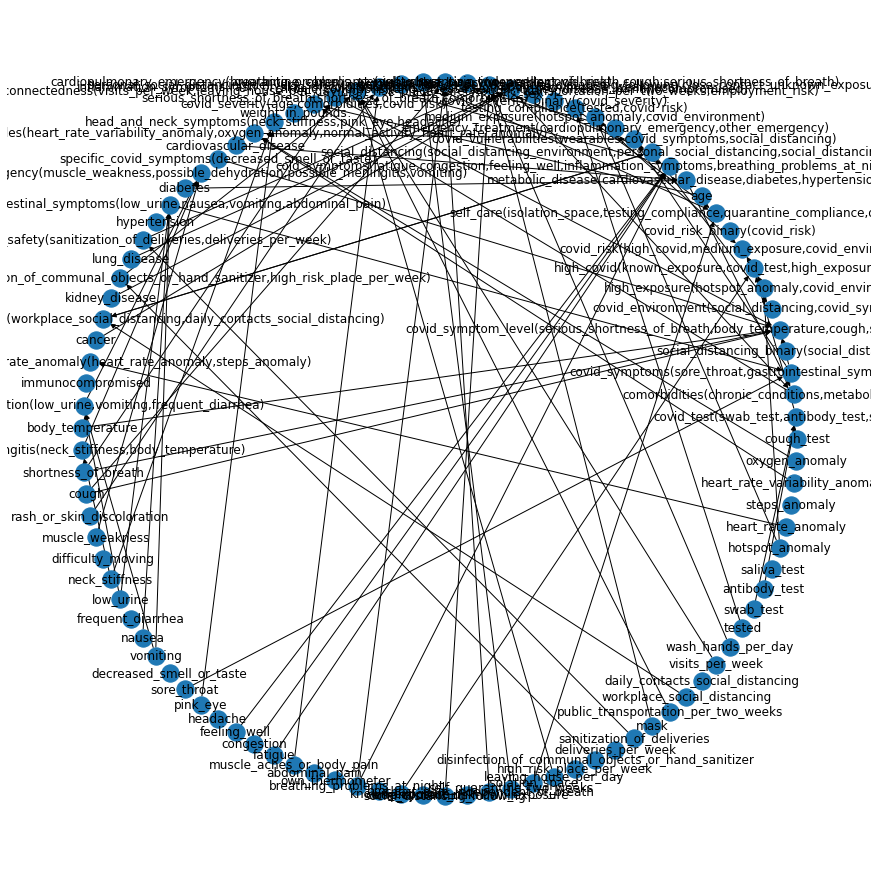

In [14]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(12,12)) 
#nx.draw(G, with_labels=True)  
#nx.draw_random(G, with_labels=True)   
nx.draw_circular(G, with_labels=True)  
#nx.draw_spectral(G, with_labels=True)   
#nx.draw_spring(G, with_labels=True)  

Here is the description of the Bayesian network in protobuf that we just created with the running of the python file.  Only the "leaves" have initial probabilities (DiscreteDistribution), the conditional probabilities (ConditionalProbabilityTable) are to be computed:

In [15]:
bayesianNetwork

discreteDistributions {
  name: "cough_test"
  variables {
    name: "positive_cough_test"
    probability: 0.05000000074505806
  }
  variables {
    name: "negative_cough_test"
    probability: 0.949999988079071
  }
}
discreteDistributions {
  name: "age"
  variables {
    name: "elderly"
    probability: 0.10000000149011612
  }
  variables {
    name: "adult"
    probability: 0.20000000298023224
  }
  variables {
    name: "young_adult"
    probability: 0.30000001192092896
  }
  variables {
    name: "teen"
    probability: 0.20000000298023224
  }
  variables {
    name: "child"
    probability: 0.20000000298023224
  }
}
discreteDistributions {
  name: "sex"
  variables {
    name: "male"
    probability: 0.5
  }
  variables {
    name: "female"
    probability: 0.5
  }
}
discreteDistributions {
  name: "height_in_feet"
  variables {
    name: "height_above_seven"
    probability: 0.05000000074505806
  }
  variables {
    name: "height_six_to_seven"
    probability: 0.25
  }
  variab

Here is the Pomegranate net we just made with the description.  Here we compile the net so we can compute probabilities with it.

In [16]:
from sn_bayes.utils import bayesInitialize
covid = bayesInitialize(bayesianNetwork)

In [17]:
covid.bake()

We we call a Pomegranate routine that shows the computed probabilities of every variable.  We have made our own utility that pulls out particular variables.

In [18]:
covid.predict_proba({}) 

array([{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "positive_cough_test" : 0.05000000130385202,
            "negative_cough_test" : 0.9499999986961479
        }
    ],
    "frozen" : false
},
       {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "elderly" : 0.09999999925494218,
            "adult" : 0.1999999985098839,
            "young_adult" : 0.30000000521540604,
            "teen" : 0.1999999985098839,
            "child" : 0.1999999985098839
        }
    ],
    "frozen" : false
},
       {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "male" : 0.5,
            "female" : 0.5
        }
    ],
    "frozen" : false
},
       {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "paramete

Here we use our query util to enter patient states as evidence (evidence), and then see the probabilities of particular variables we are interested in (outvars), in this case, the output variables.  It needs the compiled Pomegranate Bayesian network as well as the description of the network.  This routine can be used to enter a particular patients state , one question at a time, to get a continual change in probability of all states. Below, we first look at the probability of emergency treatment, covid risk, and covid severity, in general.  We start by looking at the prior distribution, before any evidence is entered.   Then, we look at it given the information that the patient is elderly. We see that the chance of severity has increased. Adding more risk factors increases risk more, and adding more severity factors increases severity more.

In [19]:
import sn_bayes
from sn_bayes.utils import query
evidence = {}
outvars= ["social_distancing","social_distancing_binary",
          "covid_risk","covid_risk_binary",
          "covid_severity", "covid_severity_binary",
          "wearables","wearables_binary",
          "emergency_treatment",
          "self_care"]
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'medium_social_distancing': 0.20000000000000026,
  'high_social_distancing': 0.239765997393165,
  'low_social_distancing': 0.49730600238334643,
  'no_social_distancing': 0.06292800022348832},
 'social_distancing_binary': {'social_distancing': 0.4397659973931653,
  'no_social_distancing': 0.5602340026068349},
 'covid_risk': {'no_covid_risk': 0.8307885664608163,
  'low_covid_risk': 0.00042441410602391623,
  'high_covid_risk': 0.16852055425791612,
  'medium_covid_risk': 0.0002664651752436822},
 'covid_risk_binary': {'covid_risk': 0.16878701943315969,
  'no_covid_risk': 0.8312129805668403},
 'covid_severity': {'high_covid_severity': 0.2583544046465351,
  'medium_covid_severity': 0.1638488601891452,
  'low_covid_severity': 0.013699418905462392,
  'no_covid_severity': 0.5640973162588574},
 'covid_severity_binary': {'covid_severity': 0.4222032648356803,
  'no_covid_severity': 0.5777967351643197},
 'wearables': {'low_anomalous_wearables': 0.09096250316556599,
  'high_ano

The explain function will tell you which nodes, whether inner or leaf, when changed, change the output variable.  A variable is on the reverse explain list if we want to know what changes to other variables will increase it.  Otherwise we look to 
changes that decrease the variable to be explained.  One may select which explanations are relevant for their purposes, as this is just a measure of dependence.

In [20]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing','social_distancing_binary'])
explain_results

{'social_distancing': {'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.12323399924166056,
  'high_risk_place_safety': 0.07169399879384397,
  'personal_social_distancing': 0.2018939995210206,
  'social_distancing_connectedness': 0.07169399879384397,
  'social_distancing_environment': 0.12432650059583694,
  'social_distancing_binary': 0.3903695047606738,
  'normal_activity_heart_rate_anomaly': 0.0,
  'wearables': 0.0,
  'wearables_binary': 0.0,
  'possible_dehydration': 0.0,
  'possible_meningitis': 0.0,
  'serious_shortness_of_breath': 0.0,
  'covid_vulnerabilities': 0.13299504131906348,
  'covid_symptom_level': -0.006840346198318803,
  'covid_environment': -0.006840346198318803,
  'high_exposure': -9.429937704086289e-06,
  'high_co

In [21]:
evidence['isolation_space']= 'isolation_space'
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'medium_social_distancing': 0.20000000000000026,
  'high_social_distancing': 0.239765997393165,
  'low_social_distancing': 0.49730600238334643,
  'no_social_distancing': 0.06292800022348832},
 'social_distancing_binary': {'social_distancing': 0.4397659973931653,
  'no_social_distancing': 0.5602340026068349},
 'covid_risk': {'no_covid_risk': 0.8307885664608163,
  'low_covid_risk': 0.00042441410602391623,
  'high_covid_risk': 0.16852055425791612,
  'medium_covid_risk': 0.0002664651752436822},
 'covid_risk_binary': {'covid_risk': 0.16878701943315969,
  'no_covid_risk': 0.8312129805668403},
 'covid_severity': {'high_covid_severity': 0.2583544046465351,
  'medium_covid_severity': 0.1638488601891452,
  'low_covid_severity': 0.013699418905462392,
  'no_covid_severity': 0.5640973162588574},
 'covid_severity_binary': {'covid_severity': 0.4222032648356803,
  'no_covid_severity': 0.5777967351643197},
 'wearables': {'low_anomalous_wearables': 0.09096250316556599,
  'high_ano

In [22]:
evidence["age"]= "elderly"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'medium_social_distancing': 0.20000000000000026,
  'high_social_distancing': 0.239765997393165,
  'low_social_distancing': 0.49730600238334643,
  'no_social_distancing': 0.06292800022348832},
 'social_distancing_binary': {'social_distancing': 0.4397659973931653,
  'no_social_distancing': 0.5602340026068349},
 'covid_risk': {'no_covid_risk': 0.8307885664608163,
  'low_covid_risk': 0.00042441410602391623,
  'high_covid_risk': 0.16852055425791612,
  'medium_covid_risk': 0.0002664651752436822},
 'covid_risk_binary': {'covid_risk': 0.16878701943315969,
  'no_covid_risk': 0.8312129805668403},
 'covid_severity': {'high_covid_severity': 0.16852055425791615,
  'medium_covid_severity': 0.5008772724241862,
  'low_covid_severity': 0.00016875008342911971,
  'no_covid_severity': 0.3304334232344685},
 'covid_severity_binary': {'covid_severity': 0.6693978266821025,
  'no_covid_severity': 0.33060217331789743},
 'wearables': {'low_anomalous_wearables': 0.09096250316556599,
  'high

In [23]:
evidence["body_temperature"]= "body_temperature_above_102F"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'medium_social_distancing': 0.20000000000000026,
  'high_social_distancing': 0.239765997393165,
  'low_social_distancing': 0.49730600238334643,
  'no_social_distancing': 0.06292800022348832},
 'social_distancing_binary': {'social_distancing': 0.4397659973931653,
  'no_social_distancing': 0.5602340026068349},
 'covid_risk': {'no_covid_risk': 0.8079483483799051,
  'low_covid_risk': 0.018966184634952303,
  'high_covid_risk': 0.17131771887594985,
  'medium_covid_risk': 0.0017677481091926414},
 'covid_risk_binary': {'covid_risk': 0.17308546698514232,
  'no_covid_risk': 0.8269145330148577},
 'covid_severity': {'high_covid_severity': 0.17131771887595,
  'medium_covid_severity': 0.4991922804600712,
  'low_covid_severity': 0.007541090633055777,
  'no_covid_severity': 0.3219489100309231},
 'covid_severity_binary': {'covid_severity': 0.6705099993360213,
  'no_covid_severity': 0.3294900006639789},
 'wearables': {'low_anomalous_wearables': 0.09096250316556599,
  'high_anomalo

In [24]:
evidence["diabetes"]= "diabetes"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'medium_social_distancing': 0.20000000000000026,
  'high_social_distancing': 0.239765997393165,
  'low_social_distancing': 0.49730600238334643,
  'no_social_distancing': 0.06292800022348832},
 'social_distancing_binary': {'social_distancing': 0.4397659973931653,
  'no_social_distancing': 0.5602340026068349},
 'covid_risk': {'no_covid_risk': 0.8077790951936071,
  'low_covid_risk': 0.018567284383739703,
  'high_covid_risk': 0.1712594745204593,
  'medium_covid_risk': 0.002394145902193677},
 'covid_risk_binary': {'covid_risk': 0.1736536204226528,
  'no_covid_risk': 0.8263463795773472},
 'covid_severity': {'high_covid_severity': 0.1712594745204594,
  'medium_covid_severity': 0.8287405254795401,
  'low_covid_severity': 0.0,
  'no_covid_severity': 0.0},
 'covid_severity_binary': {'covid_severity': 1.0, 'no_covid_severity': 0.0},
 'wearables': {'low_anomalous_wearables': 0.09096250316556599,
  'high_anomalous_wearables': 0.0019125000884763312,
  'medium_anomalous_wearabl

In [25]:
evidence["hotspot_anomaly"]= "hotspot_anomaly"
results = query(covid,bayesianNetwork,evidence,outvars)
results

{'social_distancing': {'medium_social_distancing': 0.20000000000000026,
  'high_social_distancing': 0.239765997393165,
  'low_social_distancing': 0.49730600238334643,
  'no_social_distancing': 0.06292800022348832},
 'social_distancing_binary': {'social_distancing': 0.4397659973931653,
  'no_social_distancing': 0.5602340026068349},
 'covid_risk': {'no_covid_risk': 0.7792914954700129,
  'low_covid_risk': 0.017912479909811953,
  'high_covid_risk': 0.18714091777139213,
  'medium_covid_risk': 0.015655106848783202},
 'covid_risk_binary': {'covid_risk': 0.20279602462017515,
  'no_covid_risk': 0.7972039753798248},
 'covid_severity': {'high_covid_severity': 0.1871409177713923,
  'medium_covid_severity': 0.8128590822286073,
  'low_covid_severity': 0.0,
  'no_covid_severity': 0.0},
 'covid_severity_binary': {'covid_severity': 1.0, 'no_covid_severity': 0.0},
 'wearables': {'low_anomalous_wearables': 0.09096250316556599,
  'high_anomalous_wearables': 0.0019125000884763312,
  'medium_anomalous_weara

In [26]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing': {'age': 0.0,
  'body_temperature': 0.0,
  'diabetes': 0.0,
  'hotspot_anomaly': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.12323399924166056,
  'high_risk_place_safety': 0.07169399879384397,
  'personal_social_distancing': 0.20189399952102038,
  'social_distancing_connectedness': 0.07169399879384397,
  'social_distancing_environment': 0.12432650059583672,
  'social_distancing_binary': 0.39036950476067367,
  'normal_activity_heart_rate_anomaly': 0.0,
  'wearables': 0.0,
  'wearables_binary': 0.0,
  'possible_dehydration': 0.0,
  'possible_meningitis': 0.0,
  'serious_shortness_of_breath': 0.0,
  'covid_vulnerabilities': 0.13299504131906348,
  'covid_symptom_level': -0.008880853708980119,
  'covid_en

In [27]:
evidence["known_exposure"]= "known_exposure"
results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing': {'medium_social_distancing': 0.20000000000000026,
  'high_social_distancing': 0.239765997393165,
  'low_social_distancing': 0.49730600238334643,
  'no_social_distancing': 0.06292800022348832},
 'social_distancing_binary': {'social_distancing': 0.4397659973931653,
  'no_social_distancing': 0.5602340026068349},
 'covid_risk': {'no_covid_risk': 0.0,
  'low_covid_risk': 0.0,
  'high_covid_risk': 1.0,
  'medium_covid_risk': 0.0},
 'covid_risk_binary': {'covid_risk': 1.0, 'no_covid_risk': 0.0},
 'covid_severity': {'high_covid_severity': 1.0,
  'medium_covid_severity': 0.0,
  'low_covid_severity': 0.0,
  'no_covid_severity': 0.0},
 'covid_severity_binary': {'covid_severity': 1.0, 'no_covid_severity': 0.0},
 'wearables': {'low_anomalous_wearables': 0.09096250316556599,
  'high_anomalous_wearables': 0.0019125000884763312,
  'medium_anomalous_wearables': 0.009037500559725601,
  'no_anomalous_wearables': 0.8980874961862322},
 'wearables_binary': {'anomalous_wearables': 0.010

In [28]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing': {'age': 0.0,
  'body_temperature': 0.0,
  'diabetes': 0.0,
  'hotspot_anomaly': 0.0,
  'known_exposure': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.12323399924166056,
  'high_risk_place_safety': 0.07169399879384397,
  'personal_social_distancing': 0.20189399952102038,
  'social_distancing_connectedness': 0.07169399879384397,
  'social_distancing_environment': 0.12432650059583672,
  'social_distancing_binary': 0.39036950476067367,
  'normal_activity_heart_rate_anomaly': 0.0,
  'wearables': 0.0,
  'wearables_binary': 0.0,
  'possible_dehydration': 0.0,
  'possible_meningitis': 0.0,
  'serious_shortness_of_breath': 0.0,
  'covid_vulnerabilities': 0.13299504131906348,
  'covid_symptom_level': -0.008880

Here we reset the evidence.  Compare this result to the baseline

In [29]:
evidence = {}
evidence["employment_risk"]= "health_care_worker_or_first_responder"
results = query(covid,bayesianNetwork,evidence,outvars)
results


{'social_distancing': {'medium_social_distancing': 0.20000000000000032,
  'high_social_distancing': 0.1589999987632039,
  'low_social_distancing': 0.5690000011771904,
  'no_social_distancing': 0.07200000005960537},
 'social_distancing_binary': {'social_distancing': 0.3589999987632042,
  'no_social_distancing': 0.6410000012367959},
 'covid_risk': {'no_covid_risk': 0.8307253084338865,
  'low_covid_risk': 0.0004594286515551715,
  'high_covid_risk': 0.16852581086855506,
  'medium_covid_risk': 0.00028945204600324987},
 'covid_risk_binary': {'covid_risk': 0.16881526291455823,
  'no_covid_risk': 0.8311847370854418},
 'covid_severity': {'high_covid_severity': 0.25834634834266873,
  'medium_covid_severity': 0.16386406767874045,
  'low_covid_severity': 0.01372465657813011,
  'no_covid_severity': 0.5640649274004608},
 'covid_severity_binary': {'covid_severity': 0.4222104160214091,
  'no_covid_severity': 0.5777895839785908},
 'wearables': {'low_anomalous_wearables': 0.09096250316556599,
  'high_an

In [30]:
from sn_bayes.utils import explain
explain_results =  explain(covid,bayesianNetwork,evidence,outvars,reverse_explain_list = ['social_distancing', 'social_distancing_binary'])
explain_results

{'social_distancing': {'employment_risk': 0.0,
  'covid_test': 0.0,
  'metabolic_disease': 0.0,
  'chronic_conditions': 0.0,
  'comorbidities': 0.0,
  'inflammation_symptoms': 0.0,
  'head_and_neck_symptoms': 0.0,
  'cold_symptoms': 0.0,
  'specific_covid_symptoms': 0.0,
  'gastrointestinal_symptoms': 0.0,
  'covid_symptoms': 0.0,
  'delivery_safety': 0.1409999987483016,
  'high_risk_place_safety': 0.0,
  'personal_social_distancing': 0.23099999882280842,
  'social_distancing_connectedness': 0.0,
  'social_distancing_environment': 0.1422500002942979,
  'social_distancing_binary': 0.3186755059668299,
  'normal_activity_heart_rate_anomaly': 0.0,
  'wearables': 0.0,
  'wearables_binary': 0.0,
  'possible_dehydration': 0.0,
  'possible_meningitis': 0.0,
  'serious_shortness_of_breath': 0.0,
  'covid_vulnerabilities': 0.08520076184209102,
  'covid_symptom_level': -0.00495923754491423,
  'covid_environment': -0.00495923754491423,
  'high_exposure': -7.192231493924339e-06,
  'high_covid': -7.

Now start the server from somewhere else than here.  Use the first command uncommented if you are running in a notebook , or the second command if you are running from command line.  First we run a test of the server from this jupyter notebook, then the same test from a script

In [31]:
#%run -i './sn_service/bayes_service.py' 
#python3 ./sn_service/bayes_service.py


In [32]:
from sn_bayes.utils import create_query

bayesianNetwork = covid_bayes.covid_bayes()
evidence = {}
evidence["age"]= "elderly"
evidence["diabetes"]= "diabetes"
outvars= ["social_distancing", "social_distancing_binary","emergency_treatment","covid_risk","covid_risk_binary",
          "covid_severity","covid_severity_binary", "wearables", "wearables_binary"]
explainvars= ["social_distancing", "social_distancing_binary","emergency_treatment","covid_risk","covid_risk_binary",
              "covid_severity","covid_severity_binary","wearables","wearables_binary"]
reverse_explainvars = ["social_distancing", "social_distancing_binary"]
timeseries = []
oxygen = {}
timeseries.append(oxygen)
oxygen["var"] = "heart_rate_anomaly"
timevals = []
oxygen["timevals"] = timevals

heart_rate_df = pd.read_csv(f'./data/sleep-accel/heart_rate/1066528_heartrate.txt')
firstrow = None
lastrow = None
for index, row in heart_rate_df.iterrows():
    if firstrow is None:
        firstrow= row[0]
    thisrow = row[0]-lastrow if lastrow is not None else row[0]-firstrow
    lastrow = row[0]
    reading = {}
    reading["val"] = row[1]
    reading["interval"] = thisrow
    timevals.append(reading)
query = create_query(bayesianNetwork,evidence,outvars,explainvars,reverse_explainvars,[],timeseries)


In [33]:
import grpc
import sn_service.service_spec.bayesian_pb2_grpc as grpc_bayes_grpc
import sn_service.service_spec.bayesian_pb2
from sn_service.service_spec.bayesian_pb2 import BayesianNetworkQuery
from sn_service.service_spec.bayesian_pb2 import QueryId

from sn_service import registry



endpoint = "localhost:7003" 
channel = grpc.insecure_channel("{}".format(endpoint))
stub = grpc_bayes_grpc.BayesNetStub(channel)

response = stub.StartNet(bayesianNetwork)
print("response.id")
print(response.id)
print("response.error_msg")
print(response.error_msg)
queryId = QueryId()
queryId.id = response.id
queryId.query.CopyFrom(query)
response = stub.AskNet(queryId)
print("response.varAnswers")
print(response.varAnswers)
print("response.explanations")
print(response.explanations)
print("response.anomalies")
print(response.anomalies)
print("response.error_msg")
print(response.error_msg)


response.id
76
response.error_msg

response.varAnswers
[var_num: 77
varStates {
  state_num: 3
  probability: 0.23976600170135498
}
varStates {
  state_num: 2
  probability: 0.20000000298023224
}
varStates {
  probability: 0.06292799860239029
}
varStates {
  state_num: 1
  probability: 0.4973059892654419
}
, var_num: 78
varStates {
  state_num: 1
  probability: 0.439765989780426
}
varStates {
  probability: 0.560234010219574
}
, var_num: 93
varStates {
  probability: 0.1418190449476242
}
varStates {
  state_num: 1
  probability: 0.8581809401512146
}
, var_num: 94
varStates {
  state_num: 2
  probability: 0.0004118686483707279
}
varStates {
  state_num: 1
  probability: 0.00031828033388592303
}
varStates {
  state_num: 3
  probability: 0.8307511806488037
}
varStates {
  probability: 0.16851867735385895
}
, var_num: 95
varStates {
  state_num: 1
  probability: 0.8311630487442017
}
varStates {
  probability: 0.16883695125579834
}
, var_num: 99
varStates {
  state_num: 2
}
varStates {
  st

In [34]:
from sn_service.service_spec.bayesian_pb2 import Id
id_num = Id()
id_num.id = queryId .id
response = stub.EndNet(id_num)

Here is a test of the server.  It is saving an ID for the network sent to it, in a pickle file of json.  If you run the service again, it will start at another id.


In [35]:
%run -i './test_bayes_service.py' stateless

Endpoint (localhost:7003): 
Method (stateless|statefull): stateless
response.varAnswers
[var_num: 77
varStates {
  state_num: 3
  probability: 0.23976600170135498
}
varStates {
  state_num: 2
  probability: 0.20000000298023224
}
varStates {
  probability: 0.06292799860239029
}
varStates {
  state_num: 1
  probability: 0.4973059892654419
}
, var_num: 78
varStates {
  state_num: 1
  probability: 0.439765989780426
}
varStates {
  probability: 0.560234010219574
}
, var_num: 93
varStates {
  probability: 0.1418190449476242
}
varStates {
  state_num: 1
  probability: 0.8581809401512146
}
, var_num: 94
varStates {
  state_num: 2
  probability: 0.0004118686483707279
}
varStates {
  state_num: 1
  probability: 0.00031828033388592303
}
varStates {
  state_num: 3
  probability: 0.8307511806488037
}
varStates {
  probability: 0.16851867735385895
}
, var_num: 95
varStates {
  state_num: 1
  probability: 0.8311630487442017
}
varStates {
  probability: 0.16883695125579834
}
, var_num: 99
varStates {


Wearable values can be sent in, and if there is a seasonal anomaly it will be set in the bayesian network.  Access the anomaly value by making the corresponding bayesian node value an output variable.

Read in apple watch data.  Send in a proto of a value and an interval.   For synced data, make sure the interval of the first items all tell the distance from the same point.  An interval of zero (the default in proto) means that the same as the previous is repeated.  The following gives an example with synced data.

In [36]:
import os
import re
import fnmatch
import pandas as pd

id_re = re.compile(r'^(\d+)\_.+')

anomaly_tuples = {}

for root, dirs, files in os.walk("./data/sleep-accel/heart_rate"):
    for i, filename in enumerate(files):
        if i < 10:
            #print(filename)
            pid = id_re.match(filename)
            print (f'patient {pid[1]}')
            anomaly_tuples[pid[1]] = {}
            heart_rate_df = pd.read_csv(f'./data/sleep-accel/heart_rate/{filename}')
            anomaly_tuples[pid[1]]["heart_rate_anomaly"]=[]
            firstrow = None
            lastrow = None
            for index, row in heart_rate_df.iterrows():
                if firstrow is None:
                    firstrow= row[0]
                thisrow = row[0]-lastrow if lastrow is not None else row[0]-firstrow
                lastrow = row[0]
                anomaly_tuples[pid[1]]["heart_rate_anomaly"].append((row[1],thisrow))


            listOfFiles = os.listdir("./data/sleep-accel/steps/")
            pattern = (f"{pid[1]}*")
            for entry in listOfFiles:
                if fnmatch.fnmatch(entry,pattern):
                    #print(entry)
                    steps_df = pd.read_csv(f'./data/sleep-accel/steps/{entry}')
                    anomaly_tuples[pid[1]]["steps_anomaly"]=[] #fixme, use a steps_anomaly
                    lastrow = None
                    for index, row in steps_df.iterrows():

                        if firstrow < row[0]:
                            thisrow = row[0]-lastrow if lastrow is not None else row[0]-firstrow
                            lastrow = row[0]
                            if thisrow:
                                anomaly_tuples[pid[1]]["steps_anomaly"].append((row[1],thisrow))
anomaly_params = {}

anomaly_params['heart_rate_anomaly']={}
anomaly_params['heart_rate_anomaly']['c']= 12
anomaly_params['heart_rate_anomaly']['n']=12
anomaly_params['heart_rate_anomaly']['step_size'] = 24
anomaly_params['heart_rate_anomaly']['side']='positive'
anomaly_params['heart_rate_anomaly']['window'] = 24
anomaly_params['heart_rate_anomaly']['n_steps']= 14
anomaly_params['heart_rate_anomaly']['is_all'] = False
anomaly_params['heart_rate_anomaly']['detectors']= ["InterQuartileRangeAD","AutoregressionAD", "LevelShiftAD"]


anomaly_params['steps_anomaly']={}
anomaly_params['steps_anomaly']['c']= 12
anomaly_params['steps_anomaly']['n']=12
anomaly_params['steps_anomaly']['step_size'] = 24
anomaly_params['steps_anomaly']['side']='positive'
anomaly_params['steps_anomaly']['window'] = 24
anomaly_params['steps_anomaly']['n_steps']= 14
anomaly_params['steps_anomaly']['is_all'] = False
anomaly_params['steps_anomaly']['detectors']= ["InterQuartileRangeAD","AutoregressionAD", "LevelShiftAD"]


patient 9106476
patient 2638030
patient 4426783
patient 1449548
patient 3997827
patient 46343
patient 1360686
patient 759667
patient 6220552
patient 8000685


To detect anomalies use detect_anomalies, a routine which will detect an anomaly in any or all of five ways:  autoregression for cycle based anomaly detection, level shift to detect a shift in the mean, interquartile algorithms for traditional anomaly detection, hard threshold, and percentile based threshold for rule based anomaly. The user may indicate more than one, and also that an anomaly must be considered an anomaly by any of the algoritms listed or by all the algorithms listed to be output as an anomaly. The user can adjust the parameters based on the data, for example hourly readings may require a step size of 24 for autoregression cycles every 24 hours, and 7 steps may be required for a weeks worth of hourly data.  The c parameter tells how far outside the sample we may want to define an anomaly. The routines output a high and low which are the percentiles it is set to find in an individual's data, or the individual's normal range as defined by the interquartile algorithms. These values are returned for explanations.  The bayes net is set to have an anomaly only if there exist an anomaly in the n most recent readings.  To do simple rule based threshold, set "ThresholdAD" as a detector in detect_anomalies , and to do either a threshold or a percent over a baseline, use both "ThresholdAD" and "QuantileAD", with hard threshold entered through 'high' and 'low', and percentile thresholds entered through 'high_percent' and 'low_percent', settin "is_all" to False (the default) so as to ensure that an anomaly in either algorithm would be flagged as an anomaly.  This combination is useful to medicine, for example, oxygen SPO3 should be above 90, or in the case of a chronic condition, 3% above baseline.  All these parameters are set in the protofile.  See the ADTK documentation for more information on the parameters.  

9106476
AutoregressionAD-steps_anomaly RuntimeError
Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.
var
heart_rate_anomaly
var
steps_anomaly
{'heart_rate_anomaly': 'no_heart_rate_anomaly', 'steps_anomaly': 'no_steps_anomaly'}
pid 9106476 results {'social_distancing': {'medium_social_distancing': 0.2000000000000003, 'high_social_distancing': 0.239765997393165, 'low_social_distancing': 0.49730600238334643, 'no_social_distancing': 0.06292800022348832}, 'social_distancing_binary': {'social_distancing': 0.4397659973931653, 'no_social_distancing': 0.5602340026068349}, 'emergency_treatment': {'emergency_treatment': 0.1418190501438443, 'no_emergency_treatment': 0.8581809498561556}, 'covid_risk': {'no_covid_risk': 0.8307511756015562, 'low_covid_risk': 0.000411868657804778, 'high_covid_risk': 0.16851867540645557, 'medium_covid_risk': 0.0003182803341834854}, 'covid_risk_binary': {'covid_risk': 0.16883695574063895, 'no_covid_risk': 0.831163044259

no iqr anomalies
AutoregressionAD-steps_anomaly RuntimeError
Series does not follow any known frequency (e.g. second, minute, hour, day, week, month, year, etc.
var
heart_rate_anomaly
var
steps_anomaly
{'heart_rate_anomaly': 'no_heart_rate_anomaly', 'steps_anomaly': 'steps_anomaly'}
pid 46343 results {'social_distancing': {'medium_social_distancing': 0.2000000000000003, 'high_social_distancing': 0.239765997393165, 'low_social_distancing': 0.49730600238334643, 'no_social_distancing': 0.06292800022348832}, 'social_distancing_binary': {'social_distancing': 0.4397659973931653, 'no_social_distancing': 0.5602340026068349}, 'emergency_treatment': {'emergency_treatment': 0.1418190501438443, 'no_emergency_treatment': 0.8581809498561556}, 'covid_risk': {'no_covid_risk': 0.8307511756015562, 'low_covid_risk': 0.000411868657804778, 'high_covid_risk': 0.16851867540645557, 'medium_covid_risk': 0.0003182803341834854}, 'covid_risk_binary': {'covid_risk': 0.16883695574063895, 'no_covid_risk': 0.83116304

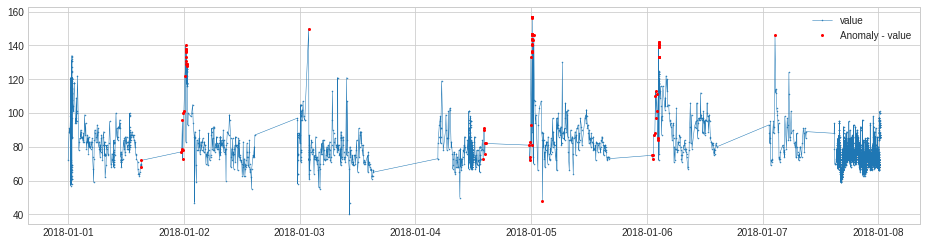

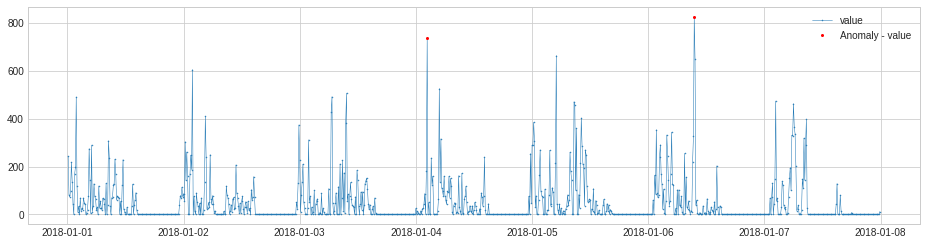

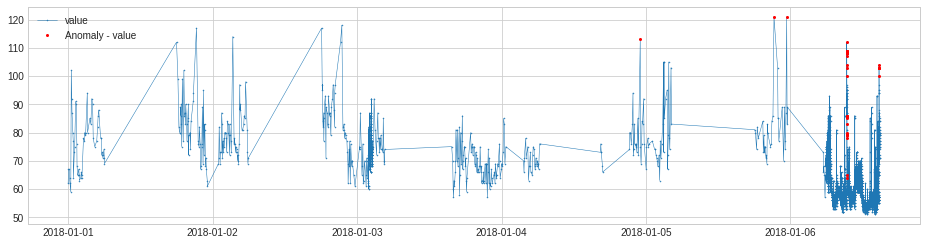

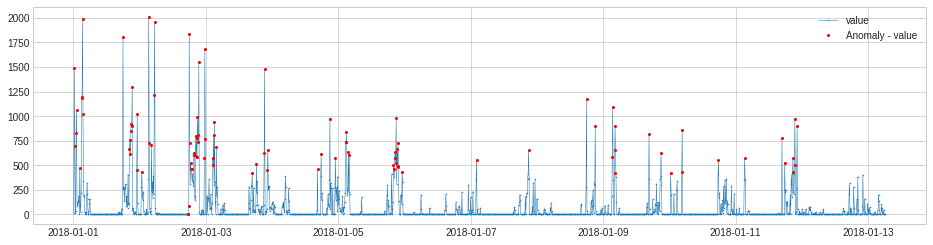

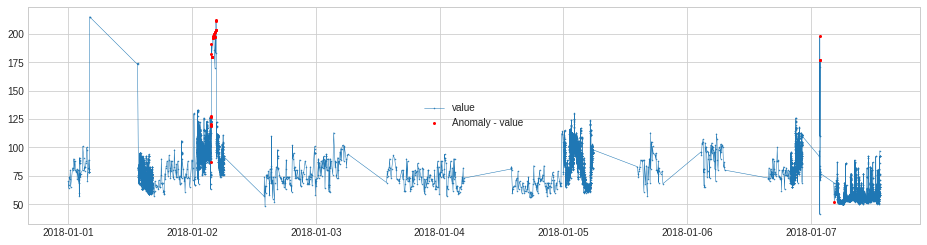

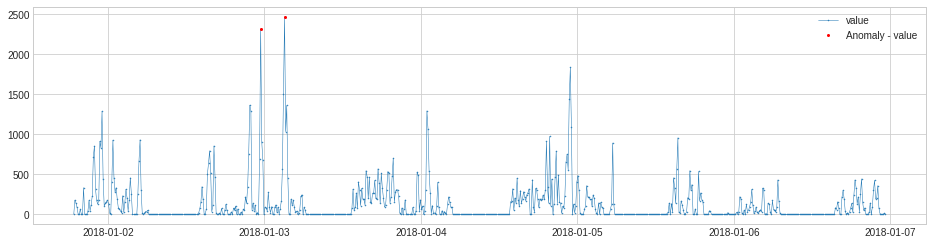

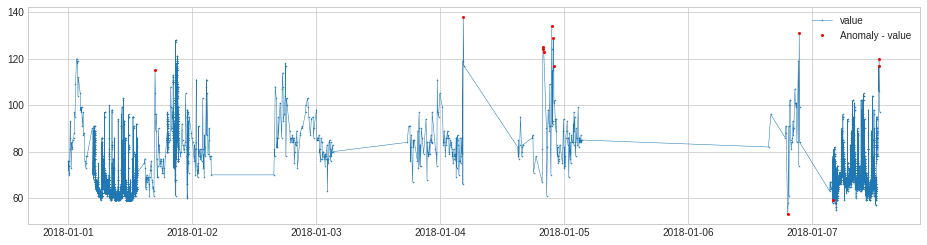

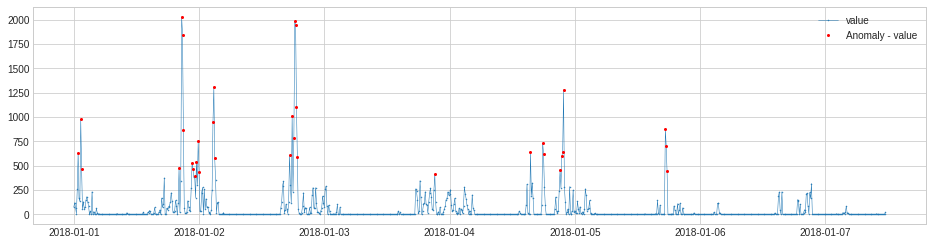

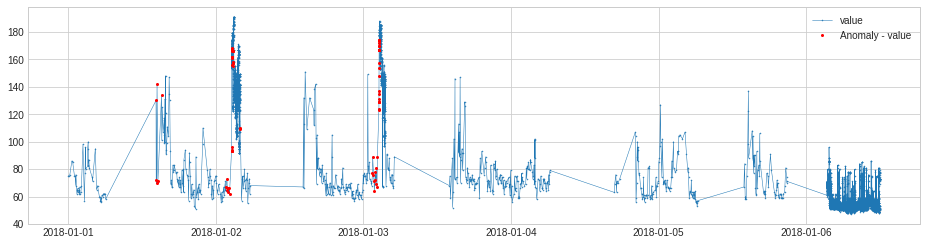

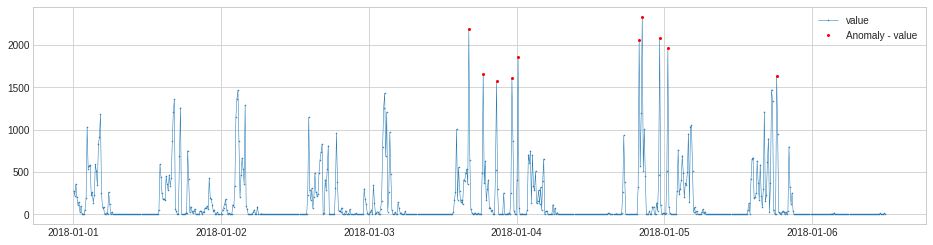

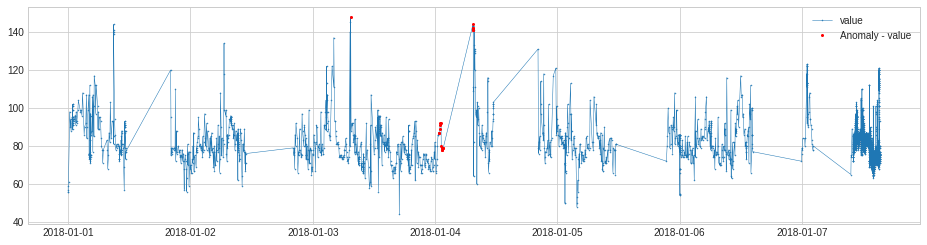

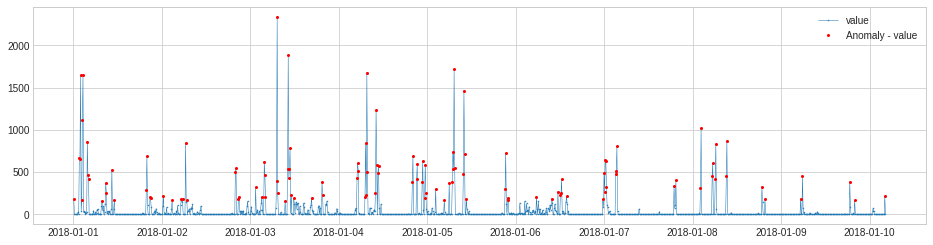

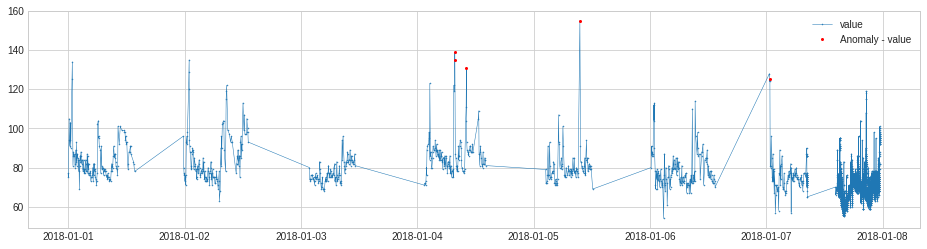

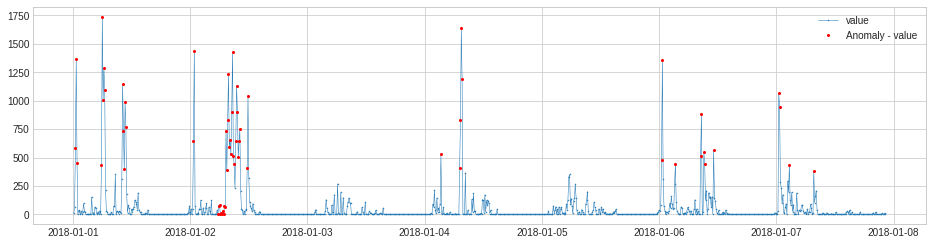

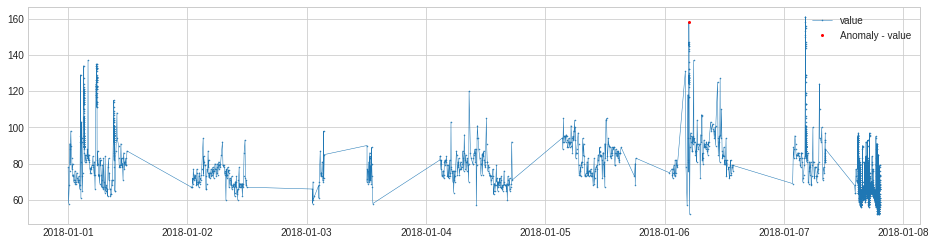

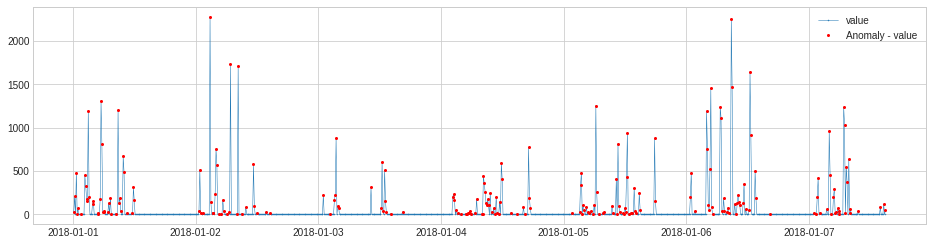

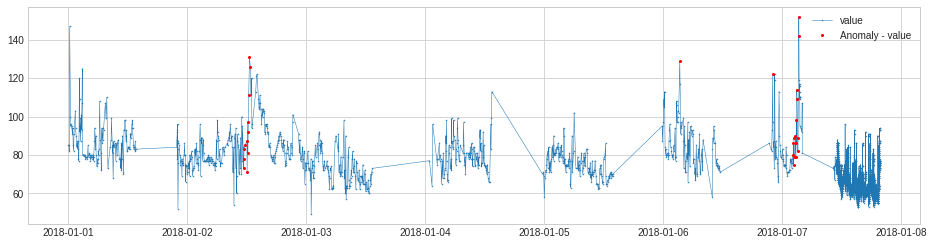

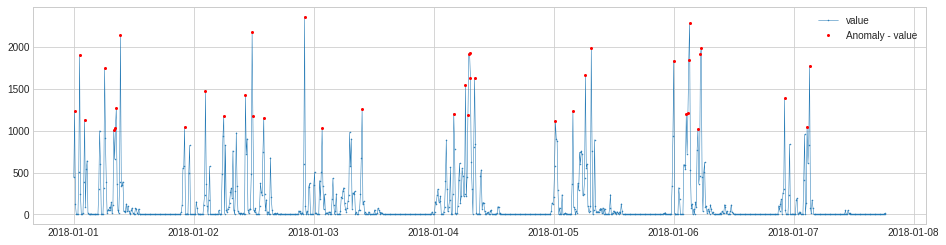

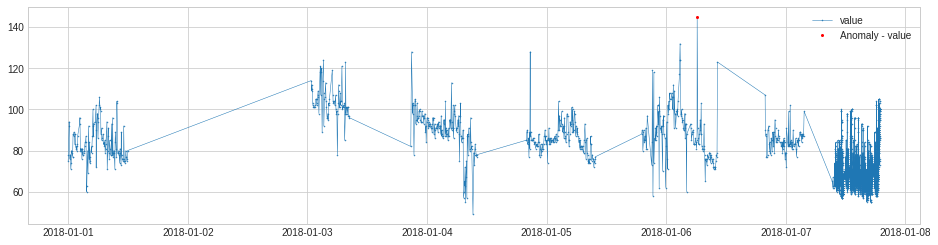

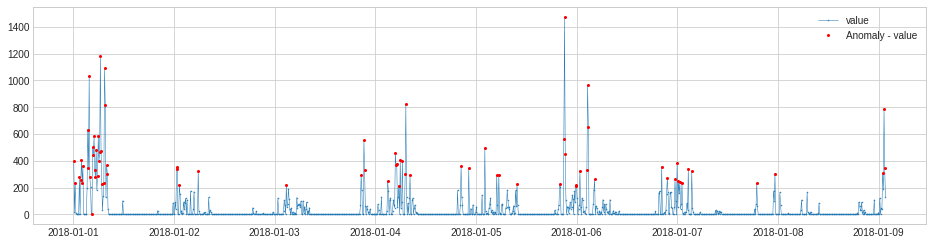

In [37]:
from sn_bayes.utils import detect_anomalies, query
from adtk.visualization import plot
pd.set_option('display.max_rows', None)

outvars= ["social_distancing", "social_distancing_binary","emergency_treatment","covid_risk","covid_risk_binary",
          "covid_severity","covid_severity_binary", "wearables", "wearables_binary","heart_rate_anomaly","steps_anomaly"]

for pid,at in anomaly_tuples.items():
    print(pid)
    anomaly_out = detect_anomalies(at,bayesianNetwork,anomaly_params)
    wearable_evidence = anomaly_out['evidence']
    anomaly_dict = anomaly_out['anomalies']
    signal_dict = anomaly_out['signal']
    for var,anomalies in anomaly_dict.items():
        
        print ("var")
        print(var)
        #print ("signal_dict[var]")
        #print (signal_dict[var])
        #print("anomalies")
        #print(anomalies)
        if len(anomalies)> 0 and len(anomalies)== len(signal_dict[var]):
            plot(signal_dict[var], anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

    print(wearable_evidence)
    evidence.update(wearable_evidence)
    results = query(covid,bayesianNetwork,evidence,outvars)
    print (f'pid {pid} results {results}')
    print("anomaly_out['fitted']")
    print(anomaly_out['fitted'])


In [38]:
outvars

['social_distancing',
 'social_distancing_binary',
 'emergency_treatment',
 'covid_risk',
 'covid_risk_binary',
 'covid_severity',
 'covid_severity_binary',
 'wearables',
 'wearables_binary',
 'heart_rate_anomaly',
 'steps_anomaly']